In [16]:

# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted


In [34]:
def wrangle(filepath):
    # Load data
    df = pd.read_csv(filepath)  

    # Remove "/year" and "/day".
    df["Price"] = df["Price"].str.replace(r"/\w+", "", regex=True) 
    df["Price"] = df["Price"].str.replace(",", "").astype(float)

    # Extract numbers and fill NaN with 0 and convert to int
    df["Bathrooms"] = df["Bathrooms"].str.extract(r"(\d+)")  
    df["Bathrooms"] = df["Bathrooms"].fillna(0).astype(int)
    
    df["Bedrooms"] = df["Bedrooms"].str.extract(r"(\d+)")  
    df["Bedrooms"] = df["Bedrooms"].fillna(0).astype(int)
    
    df["Toilets"] = df["Toilets"].str.extract(r"(\d+)") 
    df["Toilets"] = df["Toilets"].fillna(0).astype(int)

    # Remove extreme outliers (below 100K or above 40M NGN)
    df = df[(df["Price"] >= 100000) & (df["Price"] <= 40000000)]

     # One-hot encode categorical variables (City, Neighborhood)
    df = pd.get_dummies(df, columns=["City", "Neighborhood"], drop_first=True)
    
    return df  


In [35]:
filepath = "C:/Users/KINGLEY EYO/Downloads/housinginlagos.csv"
df = wrangle(filepath)

In [36]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City_Gbagada,...,Neighborhood_Other Yaba,Neighborhood_Oworonshoki,Neighborhood_Parkview Estate,Neighborhood_Randle Avenue,Neighborhood_Sabo,Neighborhood_Sangotedo,Neighborhood_Soluyi,Neighborhood_Toyin street,Neighborhood_Victoria Island Extension,Neighborhood_alausa
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4,4,5,False,...,False,False,False,False,False,False,False,False,False,False
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4,4,5,False,...,False,False,False,False,False,False,False,False,False,False
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2,3,3,False,...,False,False,False,False,False,False,False,False,False,False
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2,3,3,False,...,False,False,False,False,False,False,False,False,False,False
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4,5,5,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Title           0
More Info       0
Price           0
Serviced        0
Newly Built     0
Furnished       0
Bedrooms        0
Bathrooms       0
Toilets         0
City            0
Neighborhood    0
dtype: int64

In [20]:
df["Serviced"].unique(), df["Newly Built"].unique(), df["Furnished"].unique()



(array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64))

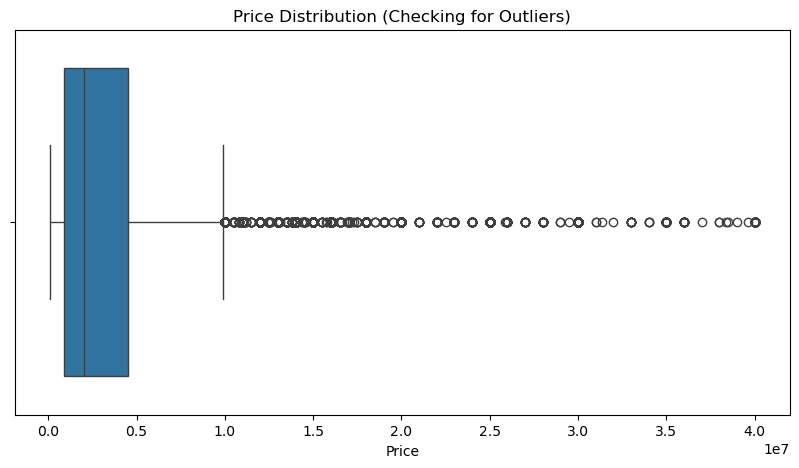

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Price"])
plt.title("Price Distribution (Checking for Outliers)")
plt.show()

In [22]:
df["Price"].describe()

count    5.226500e+04
mean     3.620680e+06
std      4.603513e+06
min      1.000000e+05
25%      9.000000e+05
50%      2.000000e+06
75%      4.500000e+06
max      4.000000e+07
Name: Price, dtype: float64

In [23]:
print("Minimum price:", df["Price"].min())  
print("Maximum price:", df["Price"].max())  
print("99th percentile price:", df["Price"].quantile(0.99))

Minimum price: 100000.0
Maximum price: 40000000.0
99th percentile price: 25000000.0


In [39]:
X = df.drop(columns=["Price", "Title", "More Info"])
y = df["Price"] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f" Model MAE: {mae:.2f}")

 Model MAE: 1560654.47


In [53]:
y_true = df["Price"]  
y_pred = [3620680] * len(df) 

baseline_mae = mean_absolute_error(y_true, y_pred)
print("Baseline MAE:", baseline_mae)

Baseline MAE: 2975224.837654262


In [54]:
print("Baseline MAE:", baseline_mae)
print("Model MAE:", mae)

print("Model is better!" if mae < baseline_mae else "Model is worse.")

Baseline MAE: 2975224.837654262
Model MAE: 1560654.4653209604
Model is better!


In [59]:
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})


In [32]:
# Iterate
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
check_is_fitted(model)

In [55]:
# Communicate results 

In [61]:
y_pred = model.predict(X_test) 
print(len(y_pred), len(y_test))  

10453 10453


In [ ]:
# Communicate results 

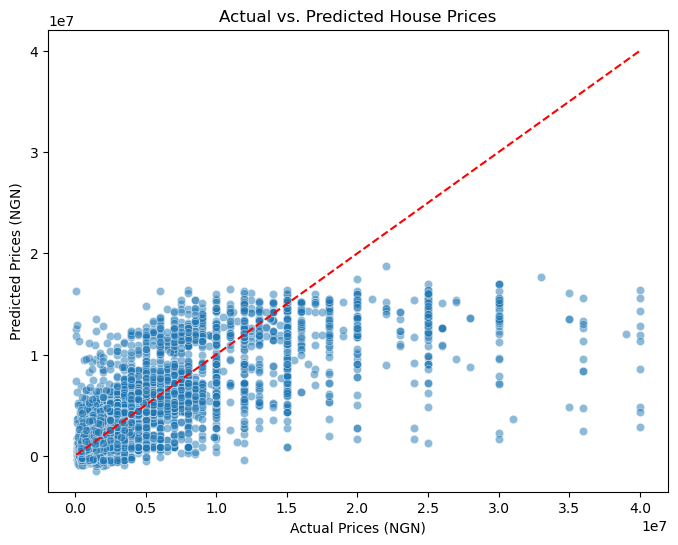

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Prices (NGN)")
plt.ylabel("Predicted Prices (NGN)")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [ ]:
df.to_csv(r'C:\Users\KINGLEY EYO\Documents\housing_in_lagos_cleaned_data.csv', index=False)